# Benchmark Plots

## Data Reading and Setup

In [51]:
# Author: Ammar Hasan 150454388 Decmber 2018
# Purpose: reads benchmarks back from db

import pymongo
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# Hosts
#MONGO_HOST = "mongodb://127.0.0.1:3306/"
MONGO_HOST = "mongodb://35.197.228.218:3306/"
DATE_TIME_FORMAT = '%Y-%m-%dT%H:%M:%S.%f'

# get mongo client
my_client = pymongo.MongoClient(MONGO_HOST)

# setup database and collections
my_db = my_client["benchdb"]
stat_col = my_db["statcollection"]
prime_calc_col = my_db["primecollection"]

# creating the pandas
columns = ['container','time','cpu', 'memory', 'netbytes']
stat_df = pd.DataFrame(columns=columns)

prime_num = 1
# iterate json to store stats
for container in stat_col.find():
    # check if it's one of the prime web containers
    if(container['name'] == 'primeswarm_prime'):
        # if so set name to primeswarm_prime1/2
        name = container['name'] + str(prime_num)
        prime_num = prime_num + 1
    else:
        name = container['name']
    for stat in container['stats']:
        time = datetime.datetime.strptime(stat['timestamp'][:-4], DATE_TIME_FORMAT).timestamp()
        cpu =  stat['cpu']['usage']['total']
        mem = stat['memory']['usage']
        net = stat['network']['rx_bytes']
        stat_df.loc[-1] = [name, time, cpu, mem, net]  
        stat_df.index = stat_df.index + 1  
        stat_df = stat_df.sort_index()
                
# extract prime time from most recent entry
for entry in prime_calc_col.find():
    prime_times = list(entry['time'])

# place prime calcuation times in a data frame
prime_calc_df = pd.DataFrame(columns=['time'])
prime_calc_df['time'] = prime_times

# sort by time for plotting        
stat_df.set_index('time',drop=True,inplace=True)
stat_df.sort_index(inplace=True) 

    time
0   1015
1   1041
2   1320
3   1046
4   1028
5   1030
6   1098
7   1039
8   1029
9   1030
10  1020
11  1026
12  1344
13  1043
14  1025
15  1035
16  1027
17  1013
18  1022
19  1025


## Prime Calculator Web Container Benchmarks

In [2]:
#subset for prime containers
prime_df1 = stat_df[stat_df['container'] == 'primeswarm_prime1']
prime_df2 = stat_df[stat_df['container'] == 'primeswarm_prime2']

### CPU

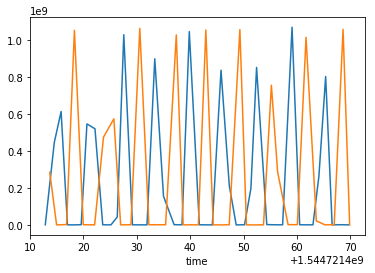

In [3]:
# ignore annoying copy warning
import warnings
warnings.filterwarnings('ignore')

# subset and plot for cpu usage (shift to get current cpu)
prime_df1['cpu2'] = prime_df1['cpu'] - prime_df1['cpu'].shift(1)
prime_df1['cpu2'].plot()

prime_df2['cpu2'] = prime_df2['cpu'] - prime_df2['cpu'].shift(1)
prime_df2['cpu2'].plot()

### Memory

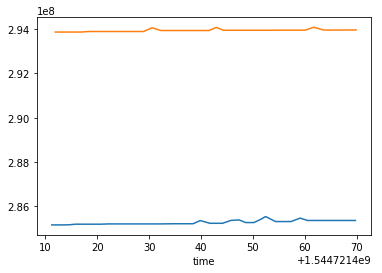

In [4]:
# subset and plot for memory usage
prime_df1['memory'].plot()
prime_df2['memory'].plot()

### Network Bytes

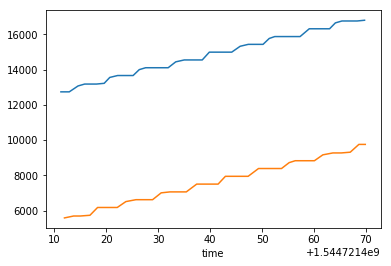

In [5]:
prime_df1['netbytes'].plot()
prime_df2['netbytes'].plot()

#### Prime Resolution Time

In [60]:
prime_calc_df.plot(kind = "bar")

ValueError: scatter requires an x and y column

## Visualiser Web Container Benchmarks

In [6]:
visual_df = stat_df[stat_df['container'] == 'primeswarm_visualizer']

### CPU

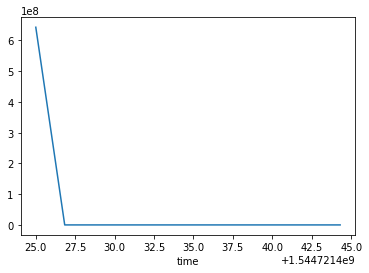

In [7]:
# ignore annoying copy warning
import warnings
warnings.filterwarnings('ignore')

# subset and plot for cpu usage (shift to get current cpu)
visual_df['cpu2'] = visual_df['cpu'] - visual_df['cpu'].shift(1)
visual_df['cpu2'].plot()

### Memory 

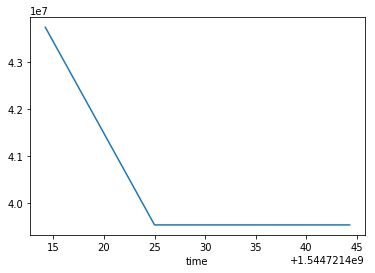

In [8]:
# subset and plot for memory usage
visual_df['memory'].plot()

### Network Bytes

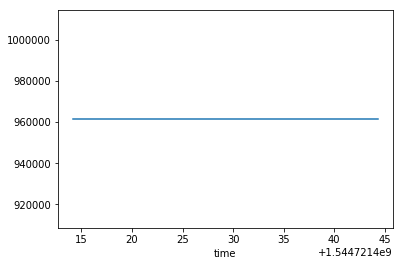

In [9]:
visual_df['netbytes'].plot()

## Mongo Container Benchmarks

In [10]:
mongo_df = stat_df[stat_df['container'] == 'primeswarm_mongo']

### CPU

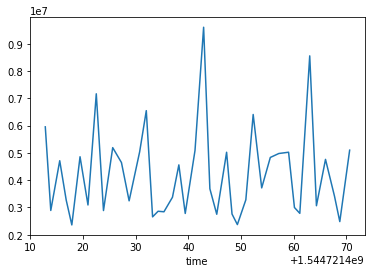

In [11]:
# ignore annoying copy warning
import warnings
warnings.filterwarnings('ignore')

# subset and plot for cpu usage (shift to get current cpu)
mongo_df['cpu2'] = mongo_df['cpu'] - mongo_df['cpu'].shift(1)
mongo_df['cpu2'].plot()

### Memory

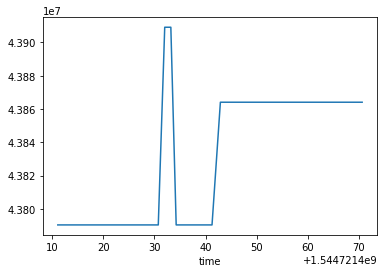

In [12]:
# subset and plot for memory usage
mongo_df['memory'].plot()

### Network Bytes

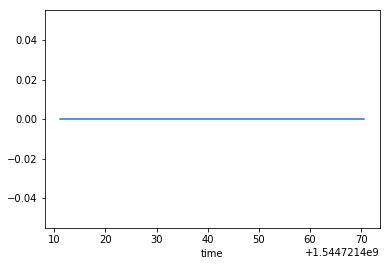

In [13]:
mongo_df['netbytes'].plot()